# SMS Spam Prediction

> NOTE: Data Downloaded from this link http://www.dt.fee.unicamp.br/~tiago//smsspamcollection/

## - Exploring and Cleaning SMS data

In [2]:
#reading text file
sms_raw <- read.delim('SMSSpamCollection.txt', header = FALSE)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"EOF within quoted string"

In [3]:
str(sms_raw)

'data.frame':	3184 obs. of  2 variables:
 $ V1: Factor w/ 2 levels "ham","spam": 1 1 2 1 1 2 1 1 2 2 ...
 $ V2: Factor w/ 3027 levels "'An Amazing Quote'' - Sometimes in life its difficult to decide whats wrong!! a lie that brings a smile or the "| __truncated__,..: 700 1898 638 2517 1692 656 591 248 2792 770 ...


We have total 3184 data and two columns, one for ham or spam and other contains messages

In [4]:
table(sms_raw$V1)


 ham spam 
2746  438 

We have total 2746 ham messages and 438 spam messages

In [5]:
# if package not install then install packages
#install.packages('tm')
library(tm)

Now, adding messages into messages into VCorpus. Reading messages in R.

In [6]:
sms_corpus <- VCorpus(VectorSource(sms_raw$V2))

In [7]:
#printing sms data
print(sms_corpus)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 3184


In [8]:
#inspecting the corpus data in R
inspect(sms_corpus[1:2])

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 2

[[1]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 111

[[2]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 29



In [9]:
#reading only sms from sms_corpus
as.character(sms_corpus[[1]])

[1] "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."

Now cleaning Process of data, lower case

In [10]:
#lower case
sms_corpus_clean <- tm_map(sms_corpus, content_transformer(tolower))

In [11]:
as.character(sms_corpus[[1]])

[1] "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."

In [12]:
as.character(sms_corpus_clean[[1]])

[1] "go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat..."

In [13]:
sms_corpus_clean <- tm_map(sms_corpus_clean, removeNumbers)

In [14]:
sms_corpus_clean <- tm_map(sms_corpus_clean, removeWords, stopwords())

In [15]:
sms_corpus_clean <- tm_map(sms_corpus_clean, removePunctuation)

In [16]:
#install.packages("SnowballC")
library(SnowballC)

In [17]:
wordStem(c('learn', 'learned', 'learning', 'learns'))

[1] "learn" "learn" "learn" "learn"

In [18]:
sms_corpus_clean <- tm_map(sms_corpus, stemDocument)

In [19]:
sms_corpus_clean <- tm_map(sms_corpus_clean, stripWhitespace)

In [20]:
sms_dtm <- DocumentTermMatrix(sms_corpus_clean)

From above we transformed data into clean vector form step by step, now doing this by only one line.

In [21]:
sms_dtm2 <- DocumentTermMatrix(sms_corpus, control = list(tolower=TRUE, 
                                                          removeNumbers=TRUE, 
                                                          stopwords=TRUE, 
                                                          removePunctuation= TRUE, 
                                                          stemming = TRUE))

In [22]:
sms_dtm

<<DocumentTermMatrix (documents: 3184, terms: 12058)>>
Non-/sparse entries: 48181/38344491
Sparsity           : 100%
Maximal term length: 57
Weighting          : term frequency (tf)

In [23]:
sms_dtm2

<<DocumentTermMatrix (documents: 3184, terms: 7022)>>
Non-/sparse entries: 34311/22323737
Sparsity           : 100%
Maximal term length: 40
Weighting          : term frequency (tf)

Taking 75% data into training set and 25% data into testing set.

In [24]:
sms_dtm_train <- sms_dtm[1:2388, ]

In [25]:
sms_dtm_test <- sms_dtm[2389: 3184, ]

In [26]:
sms_train_labels <- sms_raw[1:2388, ]$V1

In [27]:
sms_test_labels <- sms_raw[2389: 3184, ]$V1

In [28]:
prop.table(table(sms_train_labels))

sms_train_labels
      ham      spam 
0.8639028 0.1360972 

In [29]:
prop.table(table(sms_test_labels))

sms_test_labels
      ham      spam 
0.8580402 0.1419598 

### Visualizing word cloud

In [30]:
#install.packages('wordcloud')
library(wordcloud)

Loading required package: RColorBrewer


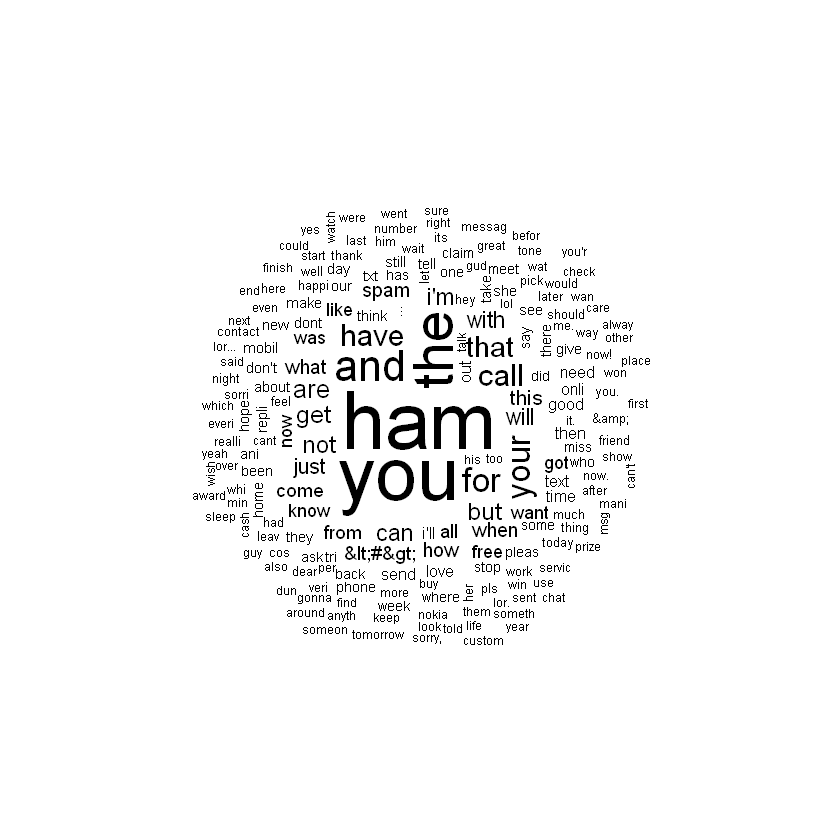

In [31]:
wordcloud(sms_corpus_clean, min.freq = 50, random.order = FALSE)

In [32]:
spam <- subset(sms_raw, V1 == "spam")

In [33]:
ham <- subset(sms_raw, V1 == "ham")

Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, function(x) removeWords(x, stopwords())):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, function(x) removeWords(x, stopwords())):
"transformation drops documents"

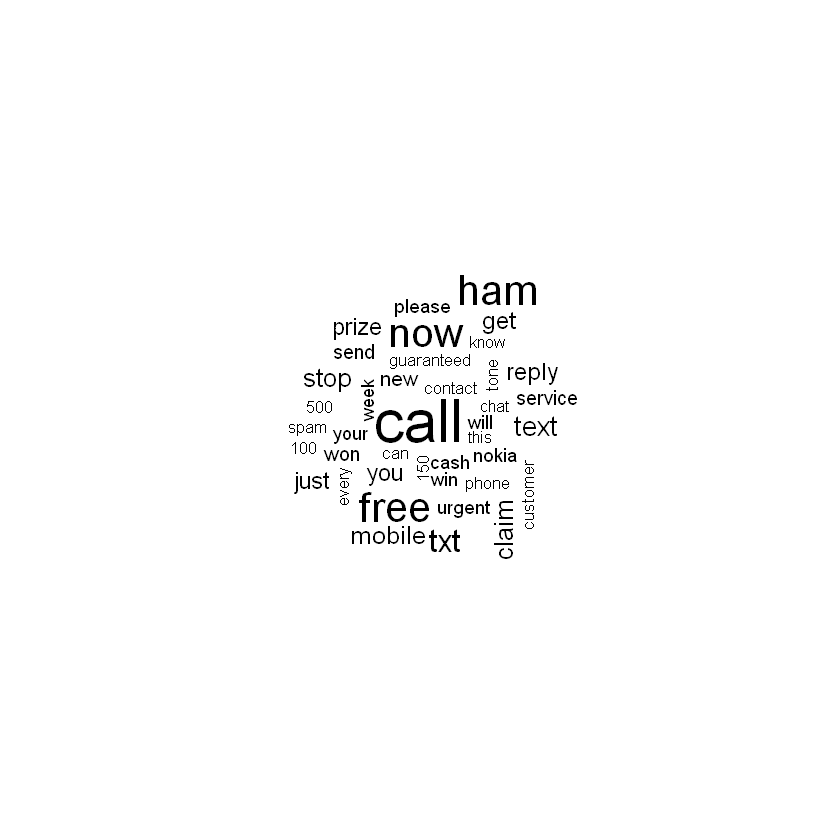

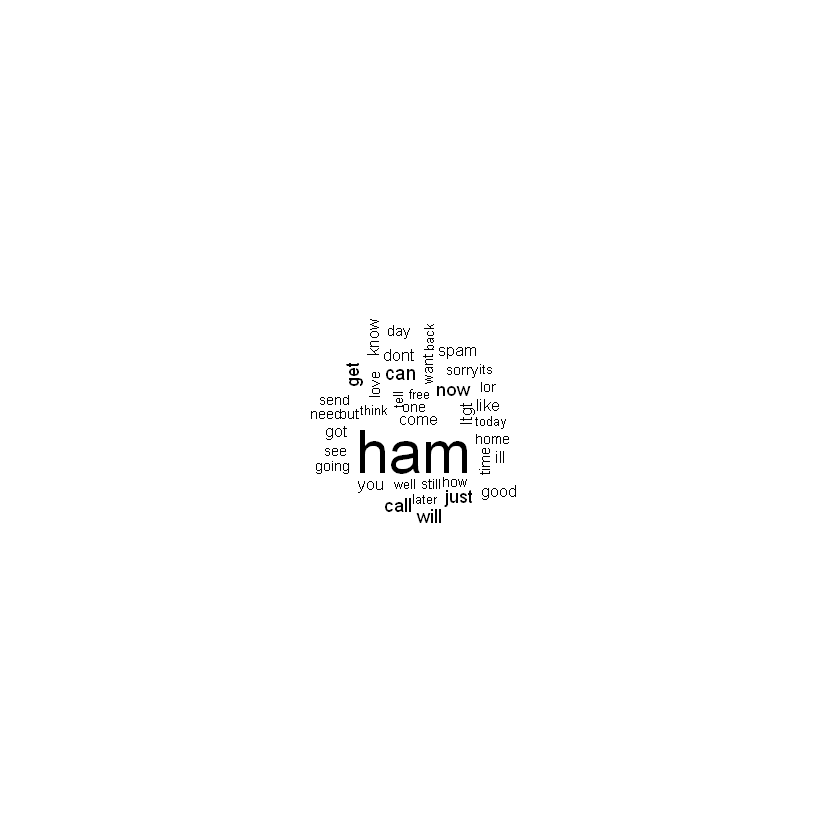

In [34]:
wordcloud(spam$V2, max.words = 40, scale = c(3, 0.5))
wordcloud(ham$V2, max.words = 40, scale = c(3, 0.5))

In [35]:
findFreqTerms(sms_dtm_train, 5)

[1] "!!''."             "&amp;"             "&lt;#&gt;"        
   [4] "&lt;decimal&gt;"   "&lt;time&gt;"      "*grins*"          
   [7] "..."               ":-("               ":-)"              
  [10] "0800"              "08000839402"       "08000930705"      
  [13] "08707509020"       "100"               "1000"             
  [16] "10p"               "12hrs"             "1327"             
  [19] "150"               "150p"              "150p/msg"         
  [22] "150p/msg."         "150ppm"            "16+"              
  [25] "18+"               "1st"               "2003"             
  [28] "20p"               "25p"               "2day"             
  [31] "2nd"               "40gb"              "500"              
  [34] "5wb"               "750"               "800"              
  [37] "8007"              "85023"             "86688"            
  [40] "87066"             "87077"             "â£1.50"           
  [43] "â£100"             "â£1000"            "â£150"            
  [46] "â£2,000"           "â£200"             "â£2000"           
  [49] "â£250"             "â£3.00"            "â£500"            
  [52] "â£5000"            "â£800"             "â\200¦"              
  [55] "â\200“"               "ã¼..."             "abiola"           
  [58] "abl"               "about"             "abt"              
  [61] "accept"            "access"            "account"          
  [64] "across"            "actual"            "actualli"         
  [67] "address"           "aft"               "after"            
  [70] "afternoon"         "afternoon,"        "afternoon."       
  [73] "aftr"              "again"             "again!"           
  [76] "again..."          "against"           "age"              
  [79] "ah?"               "ahead"             "aight"            
  [82] "aight,"            "air"               "aiyah"            
  [85] "alex"              "all"               "almost"           
  [88] "alon"              "alreadi"           "already."         
  [91] "already..."        "already?"          "alright"          
  [94] "also"              "also."             "alway"            
  [97] "and"               "angri"             "ani"              
 [100] "anoth"             "answer"            "anyon"            
 [103] "anyth"             "anytim"            "anyway"           
 [106] "apartment."        "appli"             "apply."           
 [109] "ard"               "are"               "area"             
 [112] "argument"          "around"            "arriv"            
 [115] "asap!"             "ask"               "askd"             
 [118] "ass"               "attempt"           "avail"            
 [121] "await"             "award"             "award."           
 [124] "away"              "awesom"            "awesome,"         
 [127] "b'day"             "babe"              "babe,"            
 [130] "babi"              "baby!"             "back"             
 [133] "back."             "back?"             "bad"              
 [136] "balanc"            "bank"              "bath"             
 [139] "batteri"           "bcoz"              "bcum"             
 [142] "beauti"            "becaus"            "becom"            
 [145] "bed"               "bed."              "bedroom"          
 [148] "been"              "befor"             "believ"           
 [151] "best"              "better"            "between"          
 [154] "big"               "bill"              "birthday"         
 [157] "bit"               "bless"             "blue"             
 [160] "bonus"             "book"              "bore"             
 [163] "boss"              "both"              "bout"             
 [166] "bowl"              "box"               "boy"              
 [169] "boytoy"            "break"             "bring"            
 [172] "brother"           "bslvyl"            "bugi"             
 [175] "bus"               "busi"              "but"              
 [178] "but,"              "buy"            

In [36]:
sms_freq_words <- findFreqTerms(sms_dtm_train, 5)

In [37]:
str(sms_freq_words)

 chr [1:1227] "!!''." "&amp;" "&lt;#&gt;" "&lt;decimal&gt;" "&lt;time&gt;" ...


In [38]:
sms_dtm_freq_train <- sms_dtm_train[, sms_freq_words]

In [39]:
sms_dtm_freq_test <- sms_dtm_test[, sms_freq_words]

In [40]:
convert_counts <- function(x) {
    x<- ifelse(x>0, "Yes", "No")
}

In [41]:
sms_train <- apply(sms_dtm_freq_train, MARGIN = 2, convert_counts)

In [42]:
sms_test <- apply(sms_dtm_freq_test, MARGIN = 2, convert_counts)

## - Creating model

In [43]:
#install.packages('e1071')
library(e1071)

In [44]:
sms_classifier <- naiveBayes(sms_train, sms_train_labels)

In [45]:
sms_test_pred <- predict(sms_classifier, sms_test)

## - Evaluating model performance

In [46]:
#install.packages('gmodels')
library(gmodels)

In [47]:
CrossTable(sms_test_pred, sms_test_labels, prop.chisq = FALSE, prop.t = FALSE, dnn = c('predicted','actual'))


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  796 

 
             | actual 
   predicted |       ham |      spam | Row Total | 
-------------|-----------|-----------|-----------|
         ham |       679 |        21 |       700 | 
             |     0.970 |     0.030 |     0.879 | 
             |     0.994 |     0.186 |           | 
-------------|-----------|-----------|-----------|
        spam |         4 |        92 |        96 | 
             |     0.042 |     0.958 |     0.121 | 
             |     0.006 |     0.814 |           | 
-------------|-----------|-----------|-----------|
Column Total |       683 |       113 |       796 | 
             |     0.858 |     0.142 |           | 
-------------|-----------|-----------|-----------|

 


## - Improving performance of model

In [48]:
sms_classifier2<-naiveBayes(sms_train, sms_train_labels, laplace = 1)

In [49]:
sms_test_pred2<-predict(sms_classifier2, sms_test)

In [50]:
CrossTable(sms_test_pred2, sms_test_labels, prop.chisq = FALSE, prop.t = FALSE, dnn = c('predicted','actual'))


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  796 

 
             | actual 
   predicted |       ham |      spam | Row Total | 
-------------|-----------|-----------|-----------|
         ham |       677 |        24 |       701 | 
             |     0.966 |     0.034 |     0.881 | 
             |     0.991 |     0.212 |           | 
-------------|-----------|-----------|-----------|
        spam |         6 |        89 |        95 | 
             |     0.063 |     0.937 |     0.119 | 
             |     0.009 |     0.788 |           | 
-------------|-----------|-----------|-----------|
Column Total |       683 |       113 |       796 | 
             |     0.858 |     0.142 |           | 
-------------|-----------|-----------|-----------|

 
